# RNN layers

NSF models use 1D convolution and bi-directional LSTM RNN layers.

In this notebook, we focus on bi-direcitional LSTM.
Although Pytorch provides API for bi-direcitional LSTM, we defines a Bi-LSTM RNN wrapper because:

1. Default LSTM assumes tensor shape as (length, batch, dim), but we assume (batch, length, dim);

2. Pytorch LSTM defines layer size as layer size in one direction; I define layer size as the sum of the layer sizes in two directions.


### 1. BLSTM wrapper

Operations conducted by BLSTM wrapper are illustrated in the box below
1. Input tensor has shape (batchsize, length, dim)
2. Output tensor has shape (batchsize, length, dim')
3. The wrapper conducts *permute*, Bi-LSTM transformation, and *permute* back

![Images_1](./figures/fig_c3_1.png)


In [1]:
import torch
import torch.nn as torch_nn
import torch.nn.functional as torch_nn_func

class BLSTMLayer(torch_nn.Module):
    """ Wrapper over lstm
    Input tensor:  (batchsize=1, length, dim_in)                         
    Output tensor: (batchsize=1, length, dim_out)                        
    We want to keep the length the same
    
    Define:
        BLSTMLayer(input_dim, output_dim)
    input_dim: dimension of input tensor
    output_dim: dimension of output tensor
    
    """
    def __init__(self, input_dim, output_dim):
        super(BLSTMLayer, self).__init__()
        
        # Assume output_dim is the sum of feature dimension in 
        # two directions
        if output_dim % 2 != 0:
            print("Output_dim of BLSTMLayer is {:d}".format(output_dim))
            print("BLSTMLayer expects a layer size of even number")
            sys.exit(1)
            
        # bi-directional LSTM
        self.l_blstm = torch_nn.LSTM(input_dim, output_dim // 2, \
                                     bidirectional=True)
    def forward(self, x):
        # We can also use batch_first=True instead of permute
        # permute to (length, batchsize=1, dim)                          
        y, _ = self.l_blstm(x.permute(1, 0, 2))
        # permute it backt to (batchsize=1, length, dim)
        return y.permute(1, 0, 2)


In [2]:
# Try one sample

import plot_lib
# some configurations
data = torch.zeros([2, 5, 3])
data[0] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])
data[1] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])

batch_size = data.shape[0]
frame_length = data.shape[1]
input_feature_dim = data.shape[2]
output_feature_dim = 4

with torch.no_grad():
    # create input data
    input_data = data 
    
    #torch.rand(batch_size, frame_length, input_feature_dim)
    # create blstm layer
    torch.manual_seed(1)
    l_blstm = BLSTMLayer(input_feature_dim, output_feature_dim)
    
    # compute output data
    output_data = l_blstm(input_data)

In the above example, these two lines show how to declare a BLSTMLayer and how to use it
```
l_blstm = BLSTMLayer(input_feature_dim, output_feature_dim)

output_data = l_blstm(input_data)
```    

Here, the input tensor is in shape (2, 5, 3): 2 data in one batch, 5 time steps, and 3 dimension per step.
The Bi-LSTM layer transforms the input tensor to an output tensor of shape (2, 5, 4).

(<Figure size 151.2x187.2 with 2 Axes>,
  <matplotlib.axes._axes.Axes at 0x7fd44b5a5e10>])

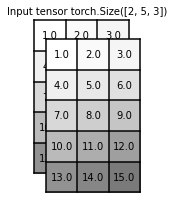

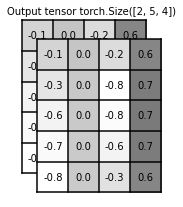

In [3]:
# input tensor
plot_lib.plot_tensor(input_data, color_on_value=True, title='Input tensor %s' % (str(input_data.shape)))

# output tensor
plot_lib.plot_tensor(output_data, color_on_value=True, title='Output tensor %s' % (str(output_data.shape)))

### 2. Permute

In the above wrapper function, *permute* is used to swap dimensions.

Here are a few examples on the usage of *permute*

(<Figure size 172.8x100.8 with 5 Axes>,
  <matplotlib.axes._axes.Axes at 0x7fd44bc5f450>])

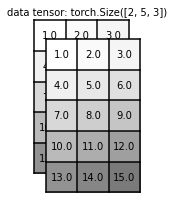

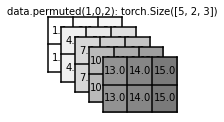

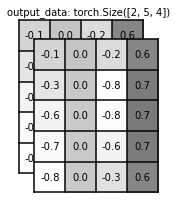

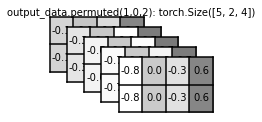

In [4]:
data = torch.zeros([2, 5, 3])
data[0] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])
data[1] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])

plot_lib.plot_tensor(data, color_on_value=True, title='data tensor: %s' % (str(data.shape)))

plot_lib.plot_tensor(data.permute(1, 0, 2), color_on_value=True, title='data.permuted(1,0,2): %s' % (str(input_data.permute(1, 0, 2).shape)))

plot_lib.plot_tensor(output_data, color_on_value=True, title='output_data: %s' % (str(output_data.shape)))

plot_lib.plot_tensor(output_data.permute(1, 0, 2), color_on_value=True, title='output_data.permuted(1,0,2): %s' % (str(output_data.permute(1, 0, 2).shape)))

The end

In [9]:
#for time_idx in range(data.permute(1, 0, 2).shape[0]):
#    _, _, = plot_lib.plot_tensor(data.permute(1, 0, 2)[time_idx:time_idx+1], color_on_value=True)
#    _, _, = plot_lib.plot_tensor(output_data.permute(1, 0, 2)[time_idx:time_idx+1], color_on_value=True)

#data = torch.zeros([2,2*5, 3])
#data[0] = torch.tensor([[1,2,3],[1,2,3], [4,5,6],[4,5,6], [7,8,9],[7,8,9], [10,11,12],[10,11,12],[13,14,15],[13,14,15]])
#data[1] = torch.tensor([[1,2,3],[1,2,3], [4,5,6],[4,5,6], [7,8,9],[7,8,9], [10,11,12],[10,11,12], [13,14,15],[13,14,15]])

#plot_lib.plot_tensor(data, color_on_value=True)

#import matplotlib
#import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize'] = (10, 5)
#
## plot input data (the 1st sequence in the batch)
#fig = plt.figure()
#axis = fig.add_subplot(111)
#axis.plot(input_data[0, :, :]);
#axis.set_xlabel('Frame index')
#axis.set_ylabel('Feature value')
#axis.legend([str(x) + '-th dimension' for x in range(input_feature_dim)])
#axis.set_title('Input data')
#
## plot output data (the 1st sequence in the batch)
#fig = plt.figure()
#axis = fig.add_subplot(111)
#axis.plot(output_data[0, :, :]);
#axis.set_xlabel('Frame index')
#axis.set_ylabel('Feature value')
#axis.legend([str(x) + '-th dimension' for x in range(output_feature_dim)])
#axis.set_title('Output data')
#
#
## print data shape
#print("Input data shape: " + str(input_data.shape))
#print("Output data shape: " + str(output_data.shape))